# E- Commerce Fraud Detection Code

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings("ignore")

In [2]:
#reading the data
customer_df = pd.read_csv("https://raw.githubusercontent.com/himanshumangal09/AML_Project/main/customer.csv")
trans_df = pd.read_csv("https://raw.githubusercontent.com/himanshumangal09/AML_Project/main/transaction_details.csv")
display(customer_df.head())
display(trans_df)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
618,618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
620,620,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
621,621,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


In [3]:
#getting the shape of transaction dataframe
trans_df.shape

(623, 11)

In [4]:
#getting the shape of customers dataframe
customer_df.shape

(168, 10)

## Data Preprocessing vs Data Visualization

In [5]:
#merging the transaction and customer dataframe
merged_df = pd.merge(customer_df, trans_df, on='customerEmail', how='left')
merged_df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0.0,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1.0,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2.0,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3.0,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4.0,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled


In [6]:
#Getting the necessary subset of the data
working_df = merged_df[["No_Transactions","No_Orders","No_Payments","paymentMethodRegistrationFailure","paymentMethodType","paymentMethodProvider","transactionAmount","transactionFailed","orderState" , "Fraud"]]
working_df.head()

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Fraud
0,2,2,1,1.0,card,JCB 16 digit,18.0,0.0,pending,False
1,2,2,1,1.0,card,JCB 16 digit,26.0,0.0,fulfilled,False
2,3,3,7,0.0,bitcoin,American Express,45.0,0.0,fulfilled,True
3,3,3,7,0.0,bitcoin,American Express,23.0,0.0,fulfilled,True
4,3,3,7,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled,True


In [7]:
#Dropping the NULL values
working_df.dropna(inplace=True)

(array([591., 227.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 10. ,  44.3,  78.6, 112.9, 147.2, 181.5, 215.8, 250.1, 284.4,
        318.7, 353. ]),
 <BarContainer object of 10 artists>)

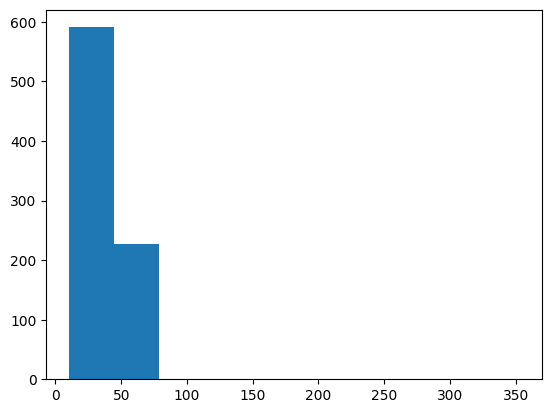

In [8]:
#plotting the transaction amount
plt.hist(working_df["transactionAmount"])

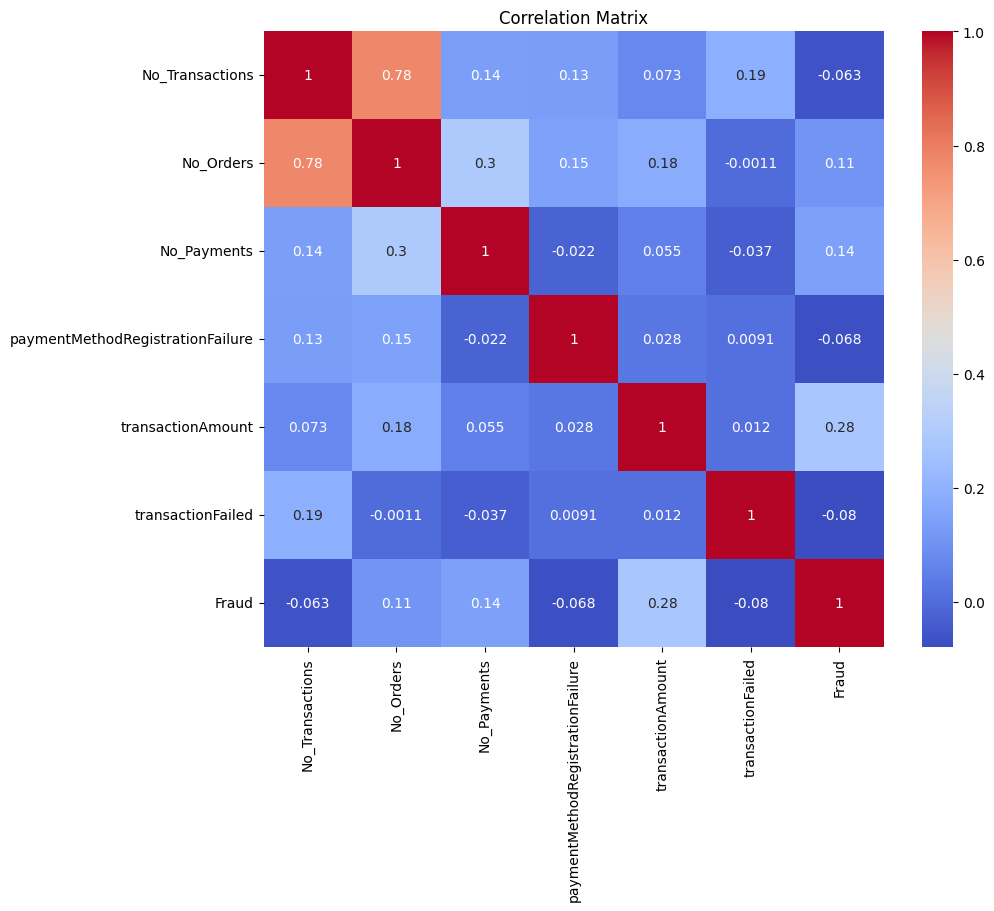

In [9]:
# Calculate the correlation matrix
corr_matrix = working_df.corr()

# Plot a heatmap of the correlations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

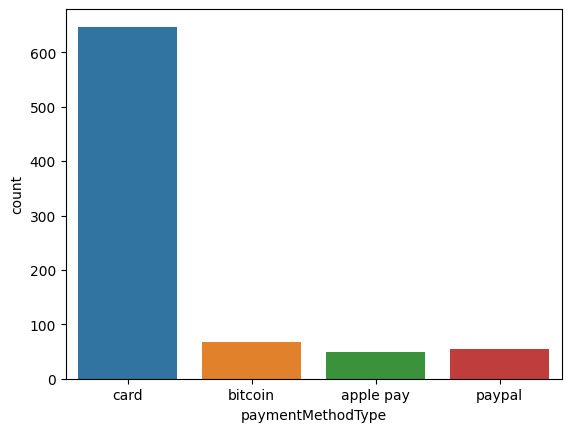

In [10]:
#plotting the types of paymentmethodtype
sns.countplot(data=working_df, x='paymentMethodType')
plt.show()

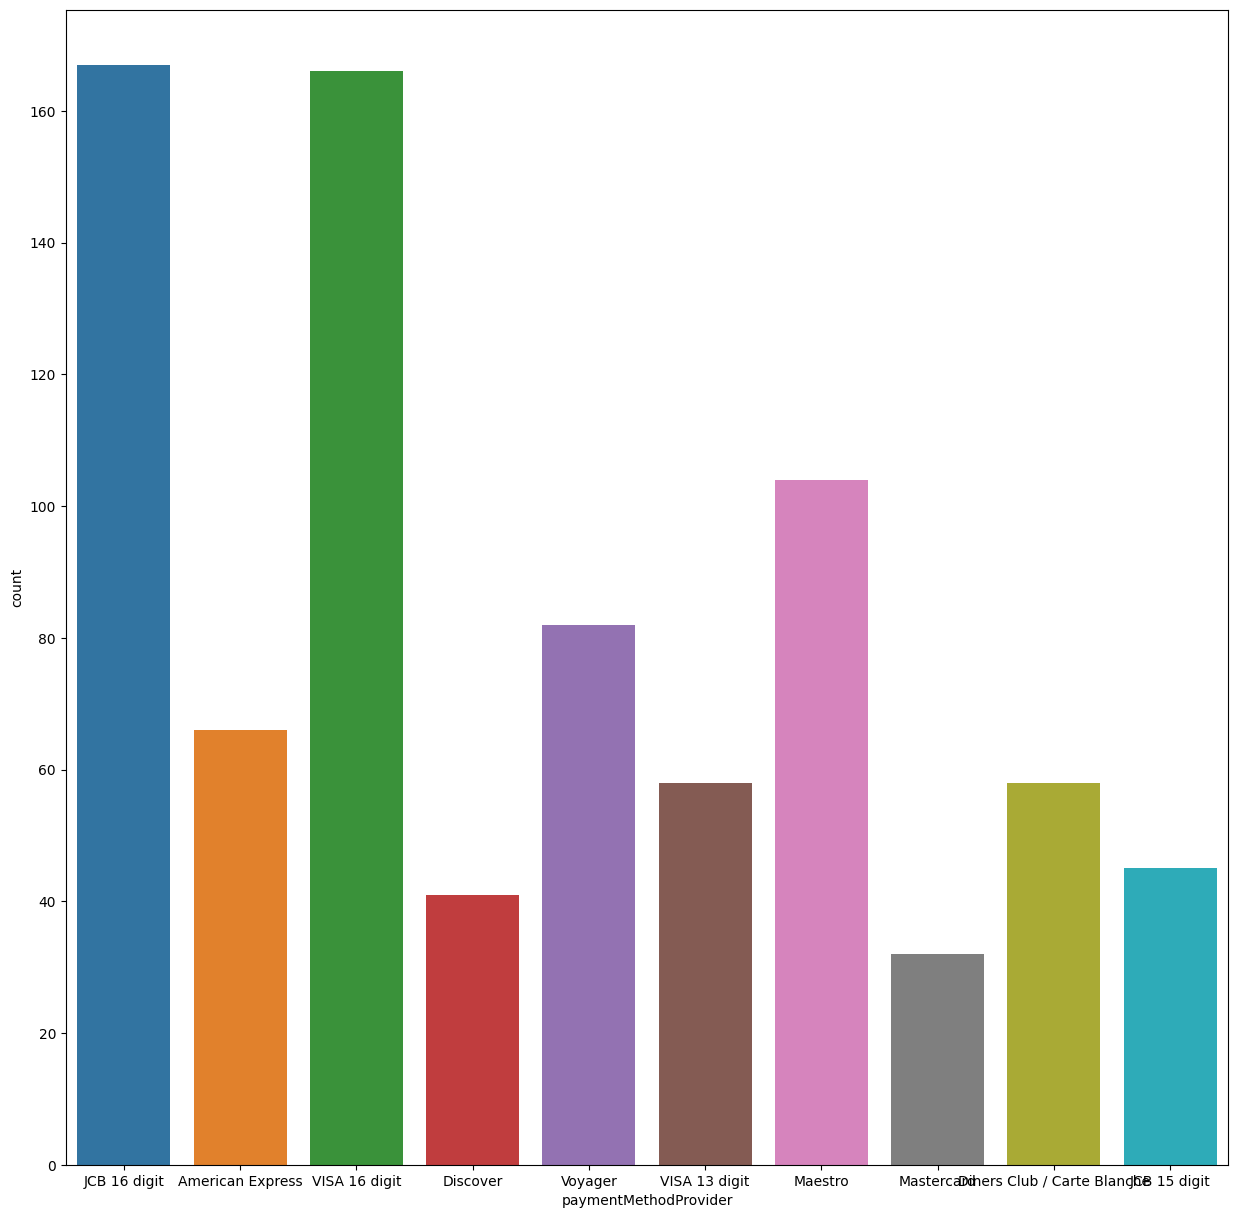

In [11]:
#plotting the types of paymentmethodProvider
plt.figure(figsize=(15, 15))
sns.countplot(data=working_df, x='paymentMethodProvider')
plt.show()

In [12]:
#One hot encode the payment method type
working_df = pd.get_dummies(working_df, columns=['paymentMethodType'])

In [13]:
#One hot encode the OrderState
working_df = pd.get_dummies(working_df, columns=['orderState'])

In [14]:
# apply one-hot encoding
le = LabelEncoder()
working_df['paymentMethodProvider'] = le.fit_transform(working_df['paymentMethodProvider'])

In [15]:
display(working_df)

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,paymentMethodProvider,transactionAmount,transactionFailed,Fraud,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,orderState_failed,orderState_fulfilled,orderState_pending
0,2,2,1,1.0,4,18.0,0.0,False,0,0,1,0,0,0,1
1,2,2,1,1.0,4,26.0,0.0,False,0,0,1,0,0,1,0
2,3,3,7,0.0,0,45.0,0.0,True,0,1,0,0,0,1,0
3,3,3,7,0.0,0,23.0,0.0,True,0,1,0,0,0,1,0
4,3,3,7,1.0,8,43.0,1.0,True,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,7,5,4,0.0,7,25.0,1.0,False,0,0,1,0,0,1,0
840,7,5,4,0.0,7,25.0,0.0,False,0,0,1,0,0,1,0
841,7,5,4,0.0,3,25.0,1.0,False,0,0,0,1,0,1,0
842,7,5,4,0.0,3,19.0,0.0,False,0,0,0,1,0,1,0


In [16]:
working_df.shape

(819, 15)

## Machine Learning Models

In [19]:
# split data into training and testing sets
X = working_df.drop('Fraud', axis=1)
y = working_df['Fraud']


# Assume 'df' is a pandas DataFrame containing the dataset to be scaled
X_v = X.values  # Extract the values as a NumPy array
columns = X.columns  # Save the column names for later use

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X_v)

# Convert the scaled data back to a pandas DataFrame
X = pd.DataFrame(X_scaled, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [20]:
working_df.head(5)

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,paymentMethodProvider,transactionAmount,transactionFailed,Fraud,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,orderState_failed,orderState_fulfilled,orderState_pending
0,2,2,1,1.0,4,18.0,0.0,False,0,0,1,0,0,0,1
1,2,2,1,1.0,4,26.0,0.0,False,0,0,1,0,0,1,0
2,3,3,7,0.0,0,45.0,0.0,True,0,1,0,0,0,1,0
3,3,3,7,0.0,0,23.0,0.0,True,0,1,0,0,0,1,0
4,3,3,7,1.0,8,43.0,1.0,True,0,1,0,0,0,1,0


### 1. Logistic Regression

In [21]:
# train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, lr_y_pred))
print('Precision:', precision_score(y_test, lr_y_pred))
print('Recall:', recall_score(y_test, lr_y_pred))
print('F1 Score:', f1_score(y_test, lr_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, lr_y_pred))


Logistic Regression:
Accuracy: 0.6280487804878049
Precision: 0.6530612244897959
Recall: 0.7032967032967034
F1 Score: 0.6772486772486773
ROC AUC Score: 0.6187716393195846


### 2. Decision Tree

In [22]:
# train decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, dt_y_pred))
print('Precision:', precision_score(y_test, dt_y_pred))
print('Recall:', recall_score(y_test, dt_y_pred))
print('F1 Score:', f1_score(y_test, dt_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.8719512195121951
Precision: 0.9166666666666666
Recall: 0.8461538461538461
F1 Score: 0.8799999999999999
ROC AUC Score: 0.8751317175974711


Random Forest

In [23]:
# train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, rf_y_pred))
print('Precision:', precision_score(y_test, rf_y_pred))
print('Recall:', recall_score(y_test, rf_y_pred))
print('F1 Score:', f1_score(y_test, rf_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, rf_y_pred))


Random Forest:
Accuracy: 0.8780487804878049
Precision: 0.9382716049382716
Recall: 0.8351648351648352
F1 Score: 0.8837209302325583
ROC AUC Score: 0.8833358422399519


Support Vector Machines

In [24]:
# train support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
print('Support Vector Machine:')
print('Accuracy:', accuracy_score(y_test, svm_y_pred))
print('Precision:', precision_score(y_test, svm_y_pred))
print('Recall:', recall_score(y_test, svm_y_pred))
print('F1 Score:', f1_score(y_test, svm_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, svm_y_pred))

Support Vector Machine:
Accuracy: 0.7378048780487805
Precision: 0.7352941176470589
Recall: 0.8241758241758241
F1 Score: 0.7772020725388602
ROC AUC Score: 0.727156405238597


## HyperParameter Tuning

### Decision Tree Hyperparameter tuning

In [25]:
# create a decision tree classifier
tree = DecisionTreeClassifier()

# define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X, y)


dt_y_pred = grid_search.predict(X_test)
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, dt_y_pred))
print('Precision:', precision_score(y_test, dt_y_pred))
print('Recall:', recall_score(y_test, dt_y_pred))
print('F1 Score:', f1_score(y_test, dt_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, dt_y_pred))



Decision Tree:
Accuracy: 0.7073170731707317
Precision: 1.0
Recall: 0.4725274725274725
F1 Score: 0.6417910447761194
ROC AUC Score: 0.7362637362637363


### Random Forest Hyperparameter tuning

In [26]:
# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search over the hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding performance
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Evaluate the performance of the model on the test set
rf_y_pred = grid_search.predict(X_test)


print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, rf_y_pred))
print('Precision:', precision_score(y_test, rf_y_pred))
print('Recall:', recall_score(y_test, rf_y_pred))
print('F1 Score:', f1_score(y_test, rf_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, rf_y_pred))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.883969465648855
Random Forest:
Accuracy: 0.8597560975609756
Precision: 0.9047619047619048
Recall: 0.8351648351648352
F1 Score: 0.8685714285714285
ROC AUC Score: 0.8627878970344725


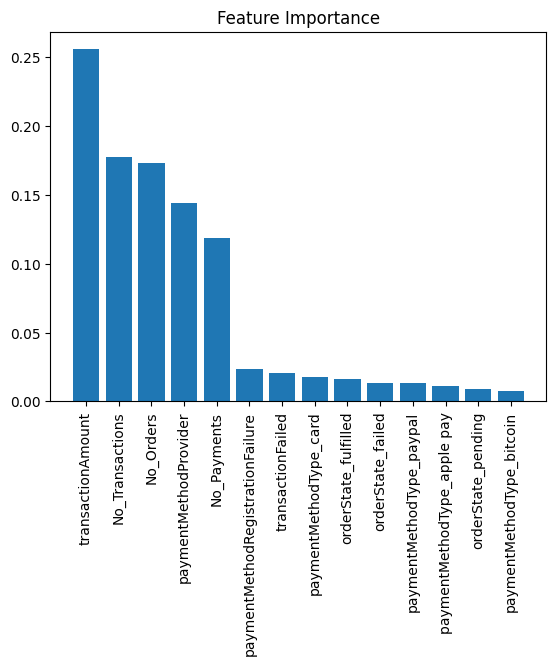

In [27]:
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [28]:
working_df.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments',
       'paymentMethodRegistrationFailure', 'paymentMethodProvider',
       'transactionAmount', 'transactionFailed', 'Fraud',
       'paymentMethodType_apple pay', 'paymentMethodType_bitcoin',
       'paymentMethodType_card', 'paymentMethodType_paypal',
       'orderState_failed', 'orderState_fulfilled', 'orderState_pending'],
      dtype='object')

In [29]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print('XGBoost:')
print('Accuracy:', accuracy_score(y_test, xgb_y_pred))
print('Precision:', precision_score(y_test, xgb_y_pred))
print('Recall:', recall_score(y_test, xgb_y_pred))
print('F1 Score:', f1_score(y_test, xgb_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, xgb_y_pred))

XGBoost:
Accuracy: 0.8536585365853658
Precision: 0.9036144578313253
Recall: 0.8241758241758241
F1 Score: 0.8620689655172414
ROC AUC Score: 0.8572933915399669


In [30]:

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Perform Grid Search with 5-fold cross validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5)

# Fit the Grid Search on the data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

xgb_y_pred = grid_search.predict(X_test)
print('XGBoost:')
print('Accuracy:', accuracy_score(y_test, xgb_y_pred))
print('Precision:', precision_score(y_test, xgb_y_pred))
print('Recall:', recall_score(y_test, xgb_y_pred))
print('F1 Score:', f1_score(y_test, xgb_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, xgb_y_pred))


Best hyperparameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost:
Accuracy: 0.9817073170731707
Precision: 0.9782608695652174
Recall: 0.989010989010989
F1 Score: 0.9836065573770493
ROC AUC Score: 0.9808068643685083


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

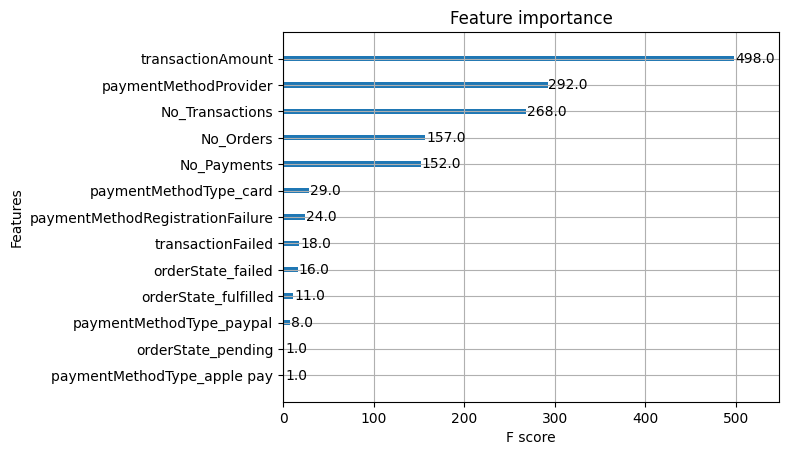

In [31]:
from xgboost import plot_importance
plot_importance(xgb_model)

In [32]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(14, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC(name='auc_roc')])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])
nn_y_pred = np.round(nn_model.predict(X_test))
print('Neural Network:')
print('Accuracy:', accuracy_score(y_test, nn_y_pred))
print('Precision:', precision_score(y_test, nn_y_pred))
print('Recall:', recall_score(y_test, nn_y_pred))
print('F1 Score:', f1_score(y_test, nn_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, nn_y_pred))

Epoch 1/100
17/17 [==============================] - 2s 21ms/step - loss: 1.1292 - auc_roc: 0.5028 - val_loss: 0.8421 - val_auc_roc: 0.4956
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9821 - auc_roc: 0.5234 - val_loss: 0.7884 - val_auc_roc: 0.4949
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.9600 - auc_roc: 0.4828 - val_loss: 0.7557 - val_auc_roc: 0.4976
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8902 - auc_roc: 0.4891 - val_loss: 0.7350 - val_auc_roc: 0.4990
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8387 - auc_roc: 0.4895 - val_loss: 0.7239 - val_auc_roc: 0.5024
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8165 - auc_roc: 0.5119 - val_loss: 0.7162 - val_auc_roc: 0.5043
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8263 - auc_roc: 0.4915 - val_loss: 0.7101 - val_auc_roc: 0.5094
Epoch 8/100
17/17 [=======

In [33]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print('Gradient Boosting:')
print('Accuracy:', accuracy_score(y_test, gb_y_pred))
print('Precision:', precision_score(y_test, gb_y_pred))
print('Recall:', recall_score(y_test, gb_y_pred))
print('F1 Score:', f1_score(y_test, gb_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, gb_y_pred))

Gradient Boosting:
Accuracy: 0.8536585365853658
Precision: 0.9036144578313253
Recall: 0.8241758241758241
F1 Score: 0.8620689655172414
ROC AUC Score: 0.8572933915399669


In [34]:
# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
print('AdaBoost:')
print('Accuracy:', accuracy_score(y_test, ada_y_pred))
print('Precision:', precision_score(y_test, ada_y_pred))
print('Recall:', recall_score(y_test, ada_y_pred))
print('F1 Score:', f1_score(y_test, ada_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, ada_y_pred))

AdaBoost:
Accuracy: 0.7987804878048781
Precision: 0.8625
Recall: 0.7582417582417582
F1 Score: 0.8070175438596491
ROC AUC Score: 0.8037784133674545


In [35]:
# Bagging
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)
bag_y_pred = bag_model.predict(X_test)
print('Bagging:')
print('Accuracy:', accuracy_score(y_test, bag_y_pred))
print('Precision:', precision_score(y_test, bag_y_pred))
print('Recall:', recall_score(y_test, bag_y_pred))
print('F1 Score:', f1_score(y_test, bag_y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, bag_y_pred))

Bagging:
Accuracy: 0.8475609756097561
Precision: 0.9342105263157895
Recall: 0.7802197802197802
F1 Score: 0.8502994011976048
ROC AUC Score: 0.8558633147674243
